In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json

In [2]:
EU_AIRPORT_2019_COMPLETE_CLEANED_PASSANGER_STAT_FILE_LOC = "../data/cleaned/eu_cleaned_airports_2019_passenger_data_complete.csv"

AIRPORTS_FILE_CLEANED_JSON = "../data/cleaned/cleaned_earth_airports.json"

EU_AIRPORTS_FILE_CLEANED_CSV = "../data/cleaned/eu_cleaned_airports.csv"

EU_AIRPORTS_2019_FILE_CLEANED_CSV = "../data/cleaned/eu_cleaned_airports_2019.csv"
EU_AIRPORTS_2019_FILE_CLEANED_JSON = "../data/cleaned/eu_cleaned_airports_2019.json"

# Read Data

In [3]:
eu_airports_df = pd.read_csv(EU_AIRPORTS_FILE_CLEANED_CSV, 
                              index_col = 0, 
                              header=0)
# eu_airports_df

In [4]:
eu_passenger_stat_2019_df = pd.read_csv(EU_AIRPORT_2019_COMPLETE_CLEANED_PASSANGER_STAT_FILE_LOC, 
                              index_col = 0, 
                              header=0)
# eu_passenger_stat_2019_df

In [5]:
with open(AIRPORTS_FILE_CLEANED_JSON) as f:
    all_airports = json.load(f)

# Airport Data Cleaning

In [6]:
eu_airports_2019_df = eu_airports_df.join(eu_passenger_stat_2019_df, on="IATA", how="inner")

In [7]:
eu_airports_2019_df.drop(['1','2','3','4','5','6','7','8','9','10','11','12'], inplace=True, axis=1)

In [8]:
eu_airports_2019_df.reset_index(drop=True, inplace=True)
eu_airports_2019_df

,Name,City,Country,IATA,Latitude,Longitude,Altitude
0,Brussels Airport,Brussels,Belgium,BRU,50.901402,4.484440,184
1,Brussels South Charleroi Airport,Charleroi,Belgium,CRL,50.459202,4.453820,614
2,Liège Airport,Liege,Belgium,LGG,50.637402,5.443220,659
3,Ostend-Bruges International Airport,Ostend,Belgium,OST,51.198898,2.862220,13
4,Dresden Airport,Dresden,Germany,DRS,51.132801,13.767200,755
...,...,...,...,...,...,...,...
182,Ängelholm-Helsingborg Airport,Ängelholm,Sweden,AGH,56.296101,12.847100,68
183,Corvo Airport,Corvo,Portugal,CVU,39.671501,-31.113600,0
184,La Rochelle-Île de Ré Airport,La Rochelle,France,LRH,46.179199,-1.195280,74
185,Lublin Airport,Lublin,Poland,LUZ,51.240278,22.713611,633


# Create JSON Data

In [16]:
eu_airports_2019_json = {}

eu_airports_2019_count = len(eu_airports_2019_df)

for eu_airport_index in range(eu_airports_2019_count):
    eu_airport_data = eu_airports_2019_df.iloc[eu_airport_index]
    eu_airport_code = eu_airport_data["IATA"]
    eu_airports_2019_json[eu_airport_code] = all_airports[eu_airport_code]
    
# eu_airports_2019_json

# Ariport Visulization

In [10]:
no_of_countries = len(eu_airports_2019_df["Country"].value_counts())
print("number of countries:", no_of_countries)

number of countries: 25


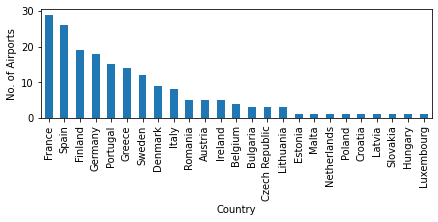

In [11]:
plt.close("all")
plt.figure()
name_plt = eu_airports_2019_df["Country"].value_counts().plot(kind='bar',figsize=(7,2))
name_plt.set_xlabel("Country")
name_plt.set_ylabel("No. of Airports")
plt.show()

# Save Airport Data

In [12]:
eu_airports_2019_df.to_csv(EU_AIRPORTS_2019_FILE_CLEANED_CSV)

In [13]:
with open(EU_AIRPORTS_2019_FILE_CLEANED_JSON, 'w') as fp:
    json.dump(eu_airports_2019_json, fp)